In [1]:
# ! pip install openml

### Libraries

In [265]:
import openml
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.base import BaseEstimator, TransformerMixin

# Visualization
import seaborn as sns
from matplotlib import pyplot as plt

# Models
from sklearn.ensemble import RandomForestClassifier

In [257]:
# dataset 1 
dataset = openml.datasets.get_dataset(1504)

X1, y1, _, _ = dataset.get_data(
    dataset_format="dataframe", target=dataset.default_target_attribute
)

# dataset 2
dataset = openml.datasets.get_dataset(1020)

X2, y2, _, _ = dataset.get_data(
    dataset_format="dataframe", target=dataset.default_target_attribute
)

# dataset 3
dataset = openml.datasets.get_dataset(1120)

X3, y3, _, _ = dataset.get_data(
    dataset_format="dataframe", target=dataset.default_target_attribute
)

# dataset 4
dataset = openml.datasets.get_dataset(1597)

X4, y4, _, _ = dataset.get_data(
    dataset_format="dataframe", target=dataset.default_target_attribute
)

Text(0.5, 1.0, 'Dataset 4 (1597)')

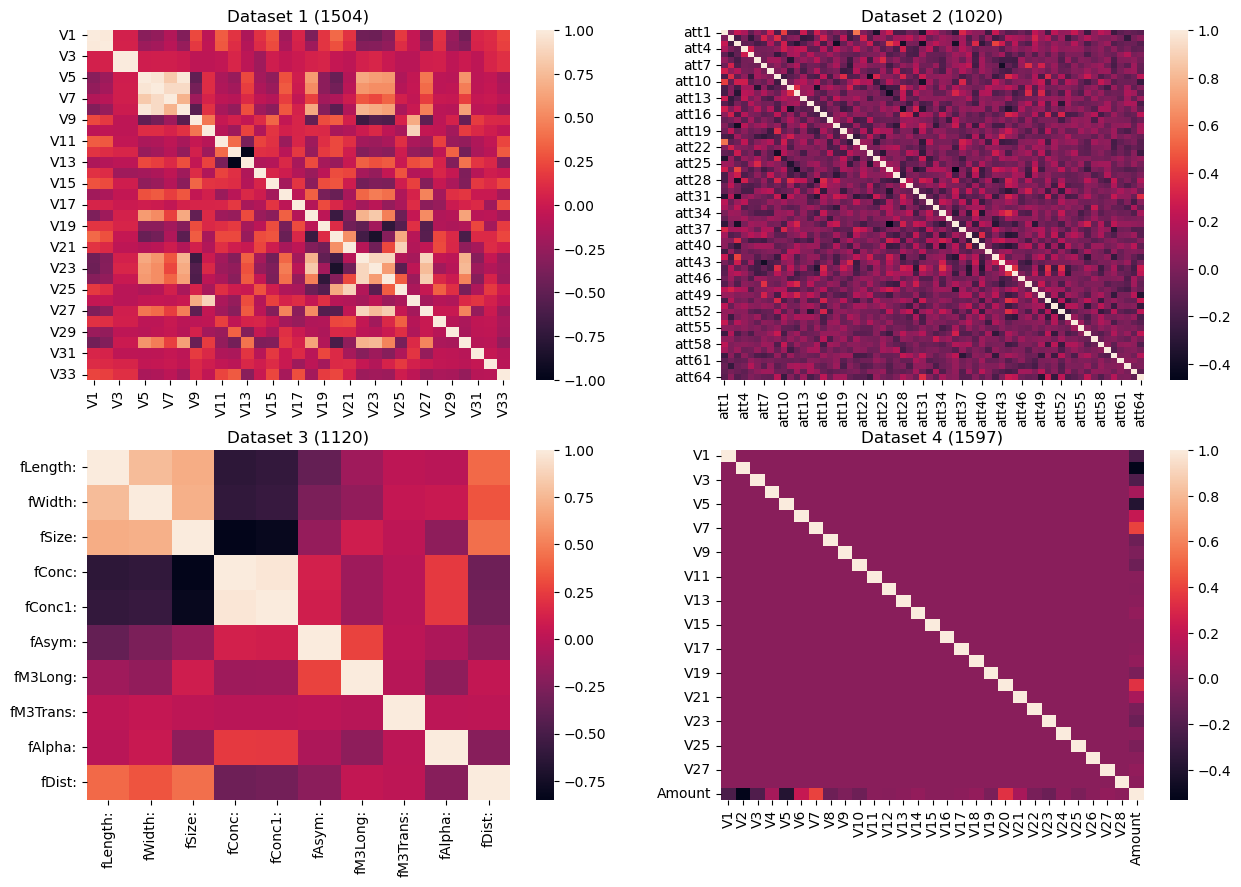

In [258]:
# correlation matrix
fig, axes = plt.subplots(2, 2, figsize = (15, 10))

cor_matrix_1 = X1.corr()
cor_matrix_2 = X2.corr()
cor_matrix_3 = X3.corr()
cor_matrix_4 = X4.corr()

sns.heatmap(cor_matrix_1, ax = axes[0,0])
axes[0,0].set_title("Dataset 1 (1504)")

sns.heatmap(cor_matrix_2, ax = axes[0,1])
axes[0,1].set_title("Dataset 2 (1020)")

sns.heatmap(cor_matrix_3,  ax = axes[1,0])
axes[1,0].set_title("Dataset 3 (1120)")

sns.heatmap(cor_matrix_4, ax = axes[1,1])
axes[1,1].set_title("Dataset 4 (1597)")

Text(0.5, 1.0, 'Dataset 4 (1597)')

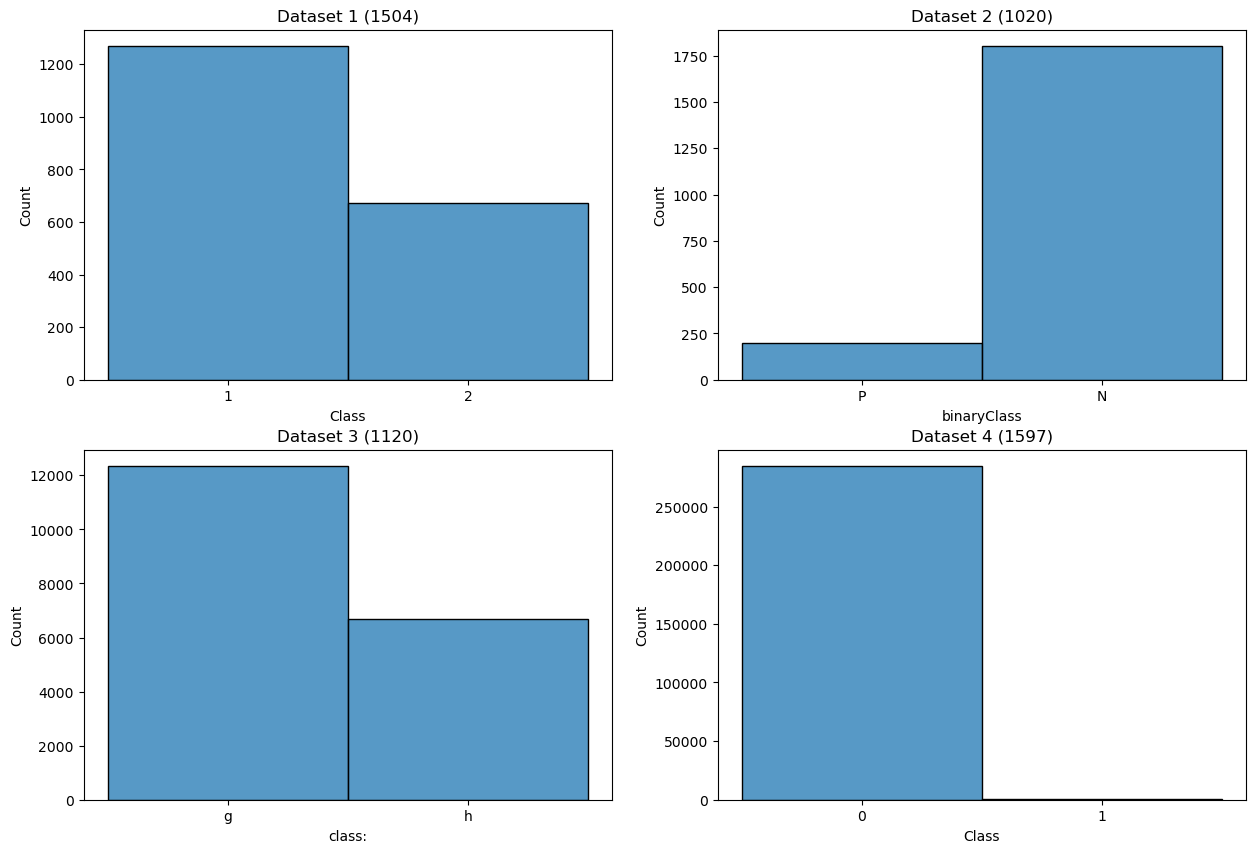

In [259]:
# distribution on targets
fig, axes = plt.subplots(2, 2, figsize = (15, 10))

sns.histplot(y1, ax=axes[0,0])
axes[0,0].set_title("Dataset 1 (1504)")

sns.histplot(y2, ax=axes[0,1])
axes[0,1].set_title("Dataset 2 (1020)")

sns.histplot(y3, ax=axes[1,0])
axes[1,0].set_title("Dataset 3 (1120)")

sns.histplot(y4, ax=axes[1,1])
axes[1,1].set_title("Dataset 4 (1597)")

In [260]:
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('one-hot-encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

col_trans = ColumnTransformer([
    ('num_pipeline', num_pipeline, make_column_selector(dtype_include = np.number)),
    ('cat_pipeline', cat_pipeline, make_column_selector(dtype_include = np.object_))
])

In [261]:
def are_correlated_removed(X, max_corr):
    corr_matrix = X.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > max_corr and i!=j:
                return corr_matrix.columns[i]
    return None 

class RemoveCorrelatedFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, max_correlation=0.75):
        self.max_correlation = max_correlation
        self.correlated_columns_ = []

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X)
            
        res = are_correlated_removed(X, self.max_correlation)
        while res is not None:
            self.correlated_columns_.append(res)
            X = X.drop(columns=[res])
            res = are_correlated_removed(X, self.max_correlation)
        return X


In [264]:
final_preprocessing_pipeline = Pipeline(steps=[
    ('preprocessing', col_trans),
    ('remove-corellated', RemoveCorrelatedFeatures(0.8)),
    ('model', RandomForestClassifier())
])

final_preprocessing_pipeline.fit(X1, y1)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x30c673580>),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot-encoder',
                                                                   OneHotEncoder(hand